In [26]:
import pandas as pd
import seaborn as sn

In [27]:
df=pd.read_csv("heights.csv")
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [28]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot: xlabel='height', ylabel='Count'>

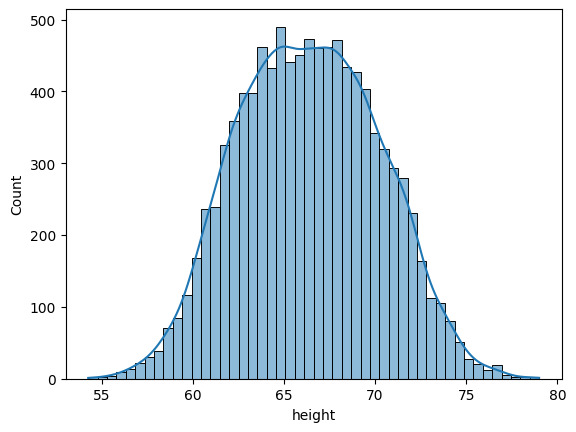

In [29]:
sn.histplot(df.height, kde=True)

1) dealing with outlier using mean and std

In [30]:
mean=df["height"].mean()
mean

66.367559754866

In [31]:
std=df["height"].std()
std

3.847528120795573

In [32]:
# getting -ve limit
Nlimit=mean-3*std
Nlimit

54.824975392479274

In [33]:
# getting +ve limit
Plimit=mean+3*std
Plimit

77.91014411725271

In [34]:
# outliers
df[(df["height"]<54.82) | (df["height"]>77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [35]:
final_df=df[(df["height"]>54.82) & (df["height"]<77.91)]

In [36]:
final_df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<AxesSubplot: xlabel='height', ylabel='Count'>

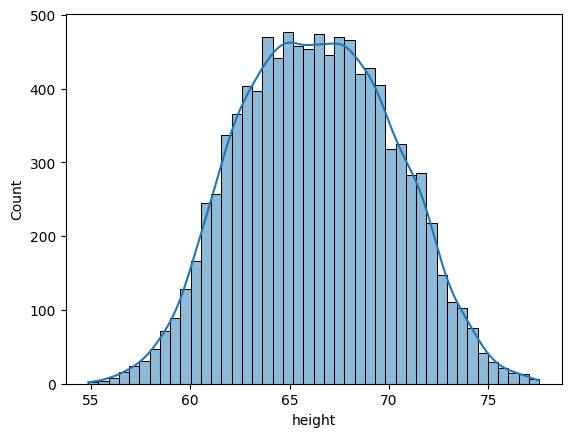

In [37]:
sn.histplot(final_df.height, kde=True)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is from it's mean

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

In [38]:
df["z-score"]=(df["height"]-df["height"].mean())/df["height"].std()
df

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [39]:
df[(df["z-score"]<-3) | (df["z-score"]>3)]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [40]:
zScore_final=df[(df["z-score"]>-3) & (df["z-score"]<3)]

In [41]:
zScore_final

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [42]:
df

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [43]:
df.describe()

,height,z-score
count,10000.000000,1.000000e+04
mean,66.367560,1.659828e-15
std,3.847528,1.000000e+00
min,54.263133,-3.146027e+00
25%,63.505620,-7.438384e-01
50%,66.318070,-1.286272e-02
75%,69.174262,7.294819e-01
max,78.998742,3.282934e+00


In [44]:
df=df.drop(columns=["z-score"])
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [46]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
print(Q1,Q3)


63.505620480000005 69.17426172750001


In [48]:
IQR = Q3 - Q1
IQR

5.668641247500005

In [49]:
lb= Q1 - 1.5 * IQR
ub= Q3 + 1.5 * IQR
print(lb,ub)

55.00265860875 77.67722359875002


In [50]:
df[(df["height"]<lb) | (df["height"]>ub)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


In [53]:
df_quartile=df[(df["height"]>lb) & (df["height"]<ub)]

In [54]:
df_quartile

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<AxesSubplot: xlabel='height', ylabel='Count'>

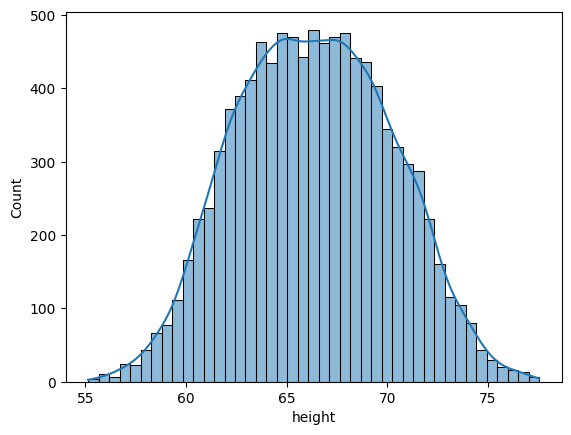

In [55]:
sn.histplot(df_quartile.height, kde=True)